In [2]:
from nltk.grammar import DependencyGrammar
from nltk.parse import DependencyGraph
from collections import Counter
import numpy as np
import re
import warnings
import os
#warnings.filterwarnings('ignore')

In [3]:
path = 'test/'
files = [path+file for file in os.listdir(path)]
files[0]

'test/aleks.conllu.txt'

In [4]:
file = open(files[0]).read()
tree = [x for x in file.split('\n\n')[0].split('\n')]
tree

['# sent_id = 3',
 '# text = От этого дома через улицу к крыльцу женской гимназии, где квартировал штаб какого-то полка, шла полоса раструшенного сена.',
 '1\tОт\tот\tADP\t_\t_\t3\tcase\t_\t_',
 '2\tэтого\tэтот\tDET\t_\tCase=Gen|Gender=Masc|Number=Sing\t3\tdet\t_\t_',
 '3\tдома\tдом\tNOUN\t_\tAnimacy=Inan|Case=Gen|Gender=Masc|Number=Sing\t17\tobl\t_\t_',
 '4\tчерез\tчерез\tADP\t_\t_\t5\tcase\t_\t_',
 '5\tулицу\tулица\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Fem|Number=Sing\t17\tobl\t_\t_',
 '6\tк\tк\tADP\t_\t_\t7\tcase\t_\t_',
 '7\tкрыльцу\tкрылец\tNOUN\t_\tAnimacy=Inan|Case=Dat|Gender=Masc|Number=Sing\t17\tobl\t_\t_',
 '8\tженской\tженский\tADJ\t_\tCase=Gen|Degree=Pos|Gender=Fem|Number=Sing\t9\tamod\t_\t_',
 '9\tгимназии\tгимназия\tNOUN\t_\tAnimacy=Inan|Case=Gen|Gender=Fem|Number=Sing\t7\tnmod\t_\tSpaceAfter=No',
 '10\t,\t,\tPUNCT\t_\t_\t12\tpunct\t_\t_',
 '11\tгде\tгде\tADV\t_\tDegree=Pos\t12\tadvmod\t_\t_',
 '12\tквартировал\tквартировать\tVERB\t_\tAspect=Imp|Gender=Masc|Mood=Ind|Numb

In [5]:
trees = []

for file in files:
    parsed_sents = open(file).read().split('\n\n')
    
    for sent in parsed_sents:
        tree = [line for line in sent.split('\n') if line[0] != '#']
        trees.append('\n'.join(tree))

In [6]:
trees[125]

'1\tСибири»\tсибирия\tPROPN\t_\tAnimacy=Inan|Case=Nom|Gender=Fem|Number=Sing\t0\troot\t_\tSpaceAfter=No\n2\t,\t,\tPUNCT\t_\t_\t1\tpunct\t_\t_\n3\tполагая\tполагать\tVERB\t_\tAspect=Imp|Tense=Pres|VerbForm=Conv|Voice=Act\t1\tacl\t_\tSpaceAfter=No\n4\t,\t,\tPUNCT\t_\t_\t8\tpunct\t_\t_\n5\tчто\tчто\tSCONJ\t_\t_\t8\tmark\t_\t_\n6\tпри\tпри\tADP\t_\t_\t7\tcase\t_\t_\n7\tнем\tон\tPRON\t_\tCase=Loc|Gender=Masc|Number=Sing|Person=3\t8\tobl\t_\t_\n8\tдолжен\tдолжен\tADJ\t_\tDegree=Pos|Gender=Masc|Number=Sing|Variant=Short\t3\tccomp\t_\t_\n9\tбыть\tбыть\tAUX\t_\tAspect=Imp|VerbForm=Inf|Voice=Act\t10\taux:pass\t_\t_\n10\tобразован\tобразовать\tVERB\t_\tAspect=Perf|Gender=Masc|Number=Sing|Tense=Past|Variant=Short|VerbForm=Part|Voice=Pass\t8\txcomp\t_\t_\n11\tотдел\tотдел\tNOUN\t_\tAnimacy=Inan|Case=Nom|Gender=Masc|Number=Sing\t8\tnsubj:pass\t_\t_\n12\tпо\tпо\tADP\t_\t_\t13\tcase\t_\t_\n13\tгород\tгород\tNOUN\t_\tAnimacy=Inan|Case=Acc|Gender=Masc|Number=Sing\t11\tnmod\t_\tSpaceAfter=No\n14\t,\t,\tP

In [7]:
[x.replace('\t', ' ') for x in trees[12].split('\n')]

['1 Я я PRON _ Case=Nom|Number=Sing|Person=1 2 nsubj _ _',
 '2 пошел пойти VERB _ Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act 0 root _ _',
 '3 тогда тогда ADV _ Degree=Pos 2 advmod _ _',
 '4 в в ADP _ _ 5 case _ _',
 '5 наборную наборный ADJ _ Case=Acc|Degree=Pos|Gender=Fem|Number=Sing 2 obl _ _',
 '6 узнать узнать VERB _ Aspect=Perf|VerbForm=Inf|Voice=Act 2 xcomp _ _',
 '7 настроение настроение NOUN _ Animacy=Inan|Case=Acc|Gender=Neut|Number=Sing 6 obj _ _',
 '8 рабочих рабочий NOUN _ Animacy=Anim|Case=Gen|Gender=Masc|Number=Plur 7 nmod _ SpaceAfter=No',
 '9 . . PUNCT _ _ 2 punct _ _']

In [8]:
d = DependencyGraph(trees[15])
d.root = d.nodes[0]

/Users/mariadolgodvorova/opt/anaconda3/lib/python3.6/site-packages/nltk/parse/dependencygraph.py:399: UserWarning: The graph doesn't contain a node that depends on the root element.
  "The graph doesn't contain a node " "that depends on the root element."


In [9]:
d.root = d.nodes[0] 
mynodes = list(d.triples())
mynodes

[((None, 'TOP'), 'root', ('застал', 'VERB')),
 (('застал', 'VERB'), 'nsubj', ('Я', 'PRON')),
 (('застал', 'VERB'), 'obj', ('Иванова', 'PROPN')),
 (('застал', 'VERB'), 'obl', ('шубе', 'NOUN')),
 (('шубе', 'NOUN'), 'case', ('в', 'ADP')),
 (('шубе', 'NOUN'), 'conj', ('шапке', 'NOUN')),
 (('шапке', 'NOUN'), 'cc', ('и', 'CCONJ')),
 (('шапке', 'NOUN'), 'acl', ('уходящим', 'VERB')),
 (('застал', 'VERB'), 'conj', ('сказал', 'VERB')),
 (('сказал', 'VERB'), 'cc', ('и', 'CCONJ')),
 (('сказал', 'VERB'), 'iobj', ('ему', 'PRON')),
 (('сказал', 'VERB'), 'obl', ('разговорах', 'NOUN')),
 (('разговорах', 'NOUN'), 'case', ('о', 'ADP')),
 (('разговорах', 'NOUN'), 'det', ('своих', 'DET')),
 (('разговорах', 'NOUN'), 'nmod', ('рабочими', 'NOUN')),
 (('рабочими', 'NOUN'), 'case', ('с', 'ADP')),
 (('застал', 'VERB'), 'punct', ('.', 'PUNCT'))]

In [10]:
a = []
s = -1
for i in mynodes:
    s = s + 1
    if mynodes[s][2][1] == 'NOUN' or mynodes[s][2][1] == 'PROPN' or mynodes[s][2][1] == 'INTJ' or mynodes[s][2][1] == 'PRON':
        if mynodes[s + 1][2][1] == 'DET' or mynodes[s + 1][2][1] == 'NUM' or mynodes[s + 1][2][1] == 'ADP':
            a.append(mynodes[s + 1][2][0])
            a.append(mynodes[s][2][0])
      
        elif mynodes[s - 1][2][1] == 'DET' or mynodes[s - 1][2][1] == 'NUM':
            a.append(mynodes[s - 1][2][0])
            a.append(mynodes[s][2][0])

        else:
            a.append(mynodes[s][2][0])

    else:
        pass

In [11]:
a

['Я',
 'Иванова',
 'в',
 'шубе',
 'шапке',
 'ему',
 'о',
 'разговорах',
 'с',
 'рабочими']

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

/Users/mariadolgodvorova/opt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/mariadolgodvorova/opt/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


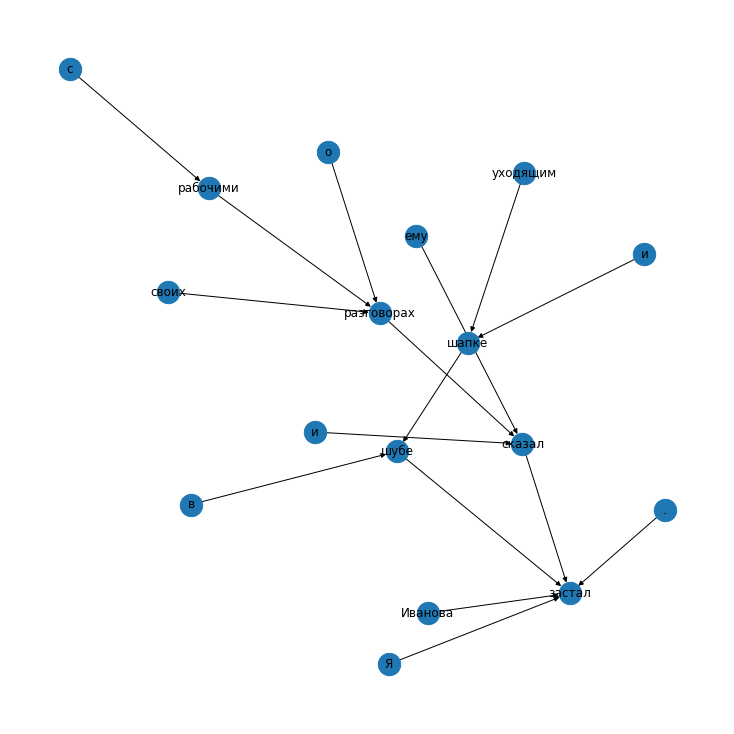

In [13]:
plt.figure(figsize=(10,10))
nx.draw(d.nx_graph(), labels=d.nx_labels, node_size=500)


In [14]:
def get_subtree(nodes, node):
    
    
    if not nodes[node]['deps']:
        return [node]
    
    else:
        return [node] + [get_subtree(nodes, dep) for rel in nodes[node]['deps'] 
                         if rel != 'punct'  # пунктуацию доставать не будем
                         for dep in nodes[node]['deps'][rel]]

In [15]:
get_subtree(d.nodes, 6)

[6]

In [16]:
def flatten(l):
    flat = []
    for el in l:
        if not isinstance(el, list):
            flat.append(el)
        else:
            flat += flatten(el)
    return flat

In [17]:
flatten(get_subtree(d.nodes, 5))

[5, 4, 7, 6, 8]

In [18]:
[d.nodes[i]['word'] for i in flatten(get_subtree(d.nodes, 2))]

['застал',
 'Я',
 'Иванова',
 'шубе',
 'в',
 'шапке',
 'и',
 'уходящим',
 'сказал',
 'и',
 'ему',
 'разговорах',
 'о',
 'своих',
 'рабочими',
 'с']

In [22]:
[d.nodes[i]['word'] for i in sorted(flatten(get_subtree(d.nodes, 5)))]

['в', 'шубе', 'и', 'шапке', 'уходящим']